In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from math import log
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image

# Download the punkt and stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')

# Get the stop words and punkt from nltk
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emdoehring/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emdoehring/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# load in file
df = pd.read_csv('Maude Latour Lyrics.csv', index_col=0)
df.head()

,Lyrics,Word Counts
One More Weekend,I fell in love with how you emphasize your sen...,"{'I': 20, 'fell': 2, 'in': 4, 'love': 1, 'with..."
Shoot and Run,"You look so good, I think you're the one\nI ca...","{'You': 6, 'look': 1, 'so': 4, 'good,': 1, 'I'..."
Walk Backwards,I guess I'll never understand\nThe line betwee...,"{'I': 19, 'guess': 1, ""I'll"": 1, 'never': 1, '..."
Furniture,I'm probably gonna get hurt this weekend\n'Cau...,"{""I'm"": 13, 'probably': 1, 'gonna': 1, 'get': ..."
Block Your Number,It's always best at the beginning\n\nI remembe...,"{""It's"": 1, 'always': 3, 'best': 1, 'at': 2, '..."


In [7]:
import os 
import pandas as pd
import numpy as np

# regular expression import
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Tokenize string.
    words = word_tokenize(string)
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)), extra_words = ['dont', 'cant', 'im', 'ive', 'ill', 'te', 'youre', 'wan', 'na', 'wa'])

texts = df['Lyrics']
    
cleaned_texts = [clean(text) for text in texts]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to a dictionary
word_tfidf = dict(zip(feature_names, tfidf_matrix.mean(axis=0).tolist()[0]))

print(word_tfidf)

{'aaaa': 0.002014322788494684, 'aaaaall': 0.001007161394247342, 'aaanyway': 0.0007214727710007324, 'able': 0.0019456457992261557, 'absolutely': 0.0006353735871642342, 'accused': 0.0007214727710007324, 'across': 0.0032241883734529463, 'act': 0.0029985088739815946, 'actin': 0.0029775804387440386, 'addicted': 0.0012778475538363638, 'address': 0.0010795255455135387, 'admit': 0.0011725207208050507, 'afford': 0.001007161394247342, 'afraid': 0.006232599905846186, 'afternoon': 0.0014887902193720193, 'ago': 0.003057760903595427, 'ah': 0.010958058593066589, 'ahah': 0.006618117752594958, 'ahhahh': 0.0036732005673141533, 'ahhahhahh': 0.0024488003782094352, 'ahhahhahhahh': 0.0036732005673141533, 'air': 0.0014469124739967133, 'alarm': 0.0007520104619046625, 'alarmin': 0.0010410265660670932, 'alibi': 0.0007520104619046625, 'aligned': 0.0009677593002828874, 'alive': 0.010362878307455435, 'alls': 0.0034439678472659697, 'almost': 0.006896423084191752, 'alone': 0.01743370252540901, 'along': 0.00106490517

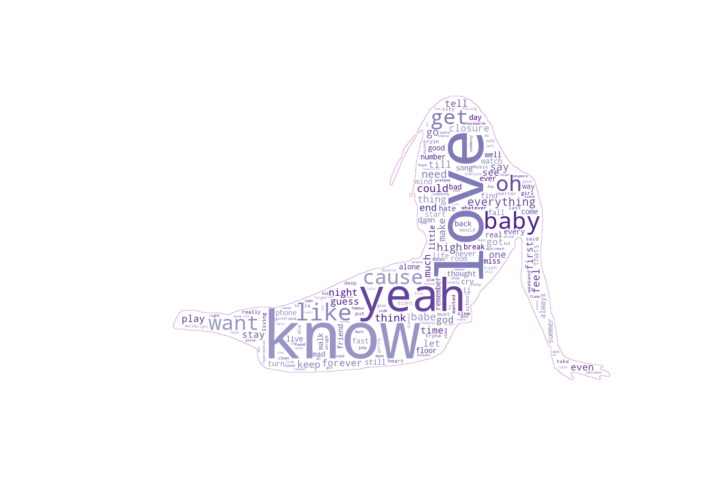

In [8]:
### colormap
# import the desired colormap from matplotlib
cmap = mpl.cm.Purples(np.linspace(0,1,20)) 
# the darker part of the matrix is selected for readability
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) 

# open the image and use np.array to transform the file to an array
cand_mask=np.array(Image.open('maude_latour.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(background_color='white',
                      contour_color='plum',
                      mask=cand_mask, 
                      colormap=cmap,
                      contour_width=0.5).generate_from_frequencies(word_tfidf)


#plot
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()